In [326]:
## standart libraries
import os,sys
import numpy as np

# xarray
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors

import cmocean

import scipy.stats as stats 

# for jupyter notebook display
%matplotlib inline


* Set gamma law: 

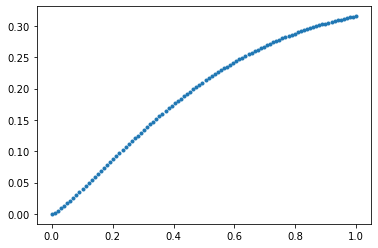

In [343]:
gg=2.3

#gg=2.05
x = np.linspace(0, 1, 100)
gam = stats.gamma.pdf(x, a=gg ,loc=0, scale=1)
gam.size

plt.plot(x, gam,'.')
plt.show()

* Get color array from standard colormap from matplotlib or cmocean :

In [344]:
cona='ice' #cmocean.cm.ice  #'bone' # 'inferno'
istart=0
levbounds=[0,1,0.01]
lmin = levbounds[0]
lmax = levbounds[1]
incr = levbounds[2]
levels =  np.arange(lmin,lmax,incr)
nice_cmap = plt.get_cmap(cmocean.cm.ice)
colors = nice_cmap(np.linspace(istart/len(levels),1,len(levels)))[:]
cmap, norm = from_levels_and_colors(levels, colors, extend='max')
#np.array(cmap.colors)

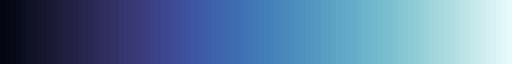

In [333]:
cmap

* Write values of colorbar in a text file with Paraview format:

In [345]:
co = np.array(cmap.colors)

scheme = cona+'-gammaggg_'+str(gg)
diro='/Users/leroux/DATA/SASIP/PARAVIEW/data/'

with open(diro+cona+'-gamma_ggg_'+str(gg)+'.xml', 'w') as fid:
    fid.write('<ColorMaps>\n')
    fid.write('<ColorMap name="{}" space="HSV">\n'.format(scheme))
    N = co.shape[0]
    for i in range(N):
        x = [(i-1)/(N-1)] + co[i,:].tolist()
        y = gam[i+1]*(1/gam.max())
        print(x)
        fid.write('<Point x="{:2f}" o="{:2f}" r="{:2f}" g="{:2f}" b="{:2f}" />\n'.format(y,x[4],x[1],x[2],x[3]))

    fid.write('</ColorMap>\n')
    fid.write('</ColorMaps>')

[-0.01020408163265306, 0.015311674355437298, 0.02252059388699532, 0.07272873735907764, 1.0]
[0.0, 0.020901330062031733, 0.028526522450710447, 0.0840777157742097, 1.0]
[0.01020408163265306, 0.030804281460523934, 0.03867708164670261, 0.10096626734400257, 1.0]
[0.02040816326530612, 0.03841359784116893, 0.04587404239998997, 0.11217763406434189, 1.0]
[0.030612244897959183, 0.05041621762087679, 0.05633788824565918, 0.12902168309276818, 1.0]
[0.04081632653061224, 0.058230002551288386, 0.06313585840823013, 0.140265173920284, 1.0]
[0.05102040816326531, 0.06970669712558172, 0.07310909804078333, 0.1571701055775911, 1.0]
[0.061224489795918366, 0.08092190572547825, 0.08284856571837035, 0.17416973047086362, 1.0]
[0.07142857142857142, 0.08826407983557263, 0.08923087230589588, 0.18556525482421357, 1.0]
[0.08163265306122448, 0.09908760199831237, 0.09865735598928838, 0.202788508027131, 1.0]
[0.09183673469387756, 0.10618074812931158, 0.10485339878284095, 0.2143771619600378, 1.0]
[0.10204081632653061, 0.1